In [1]:
import ect
from ect.optimizers import ECTFullOptimizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/10
ect_offset = radius/5

n_knots = 10

In [2]:
def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return x/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

In [3]:
opt = ECTFullOptimizer(
    image_path = "../sample_imgs/shrek.png",
    radius = radius,
    n_knots = n_knots,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y)
)

result = opt.optim(tol = 1e-3)

# solution = result['x'][0]


Current loss=1.176
Current loss=0.097
Current loss=-0.584
Current loss=-1.269
Current loss=-1.999
Current loss=-3.088
Current loss=-3.799
Current loss=-4.114
Current loss=-4.658
Current loss=-5.026
Current loss=-5.286
Current loss=-5.582
Current loss=-6.092
Current loss=-6.503
Current loss=-6.915
Current loss=-7.288
Current loss=-7.430
Current loss=-7.595
Current loss=-7.606
Current loss=-7.627
Current loss=-7.668
Current loss=-7.742
Current loss=-7.857
Current loss=-7.910
Current loss=-7.947
Current loss=-7.998
Current loss=-8.073
Current loss=-8.115
Current loss=-8.131
Current loss=-8.150
Current loss=-8.170
Current loss=-8.192
Current loss=-8.213
Current loss=-8.236
Current loss=-8.260
Current loss=-8.283
Current loss=-8.304
Current loss=-8.328
Current loss=-8.357
Current loss=-8.379
Current loss=-8.387
Current loss=-8.394
Current loss=-8.396
Current loss=-8.399
Current loss=-8.400
Current loss=-8.402
Current loss=-8.403
Current loss=-8.403
Current loss=-8.404
Current loss=-8.405
Cu

In [4]:
result

      fun: -8.455014965766598
 hess_inv: array([[ 1.38069704e+00, -9.86585489e-01,  6.89028377e+00,
         4.03769480e-01,  4.09268663e-01,  6.29810280e-01,
         5.93054646e-01,  4.65976681e-01, -1.36442013e+00,
        -7.42007147e+00,  7.36203150e-02, -3.16404412e-02,
         2.44746211e-02,  2.49810207e-01,  2.49971003e+00,
         4.61939813e+00,  2.39576549e+00,  1.06777769e+00,
         6.98564396e-01,  8.76972367e-01, -3.47436816e-04,
         0.00000000e+00, -8.82930760e-01,  0.00000000e+00],
       [-9.86585489e-01,  3.64461600e+00, -1.78149042e+01,
         1.16517472e-01, -7.63545227e-01, -1.28694885e+00,
        -1.20204186e+00, -1.10883951e+00,  2.24621832e+00,
         1.81508890e+01,  6.89288522e-02,  2.64019617e-03,
        -2.87297878e-02, -3.94183983e-01, -5.96205685e+00,
        -1.05910138e+01, -5.34805006e+00, -2.38341174e+00,
        -1.56492432e+00, -1.97601855e+00,  8.44751853e-04,
         0.00000000e+00,  2.03397231e+00,  0.00000000e+00],
       [ 6.89

In [12]:
solution

array([  1.10079625,   0.06405237,   5.1949342 ,   4.82815161,
         4.17926219,   4.19322953,   3.81717688,   1.0717405 ,
       -10.09577397,  -9.37777263,   0.07338646,  -0.04653836,
         0.05480232,   0.68583369,   8.97382172,  17.55051516,
         9.04814253,   3.92398009,   2.53011799,   3.28097694,
         0.36068612,   0.27495301,  -1.17558629,   0.32276388])

opt.loss(solution)=-8.455014965766598


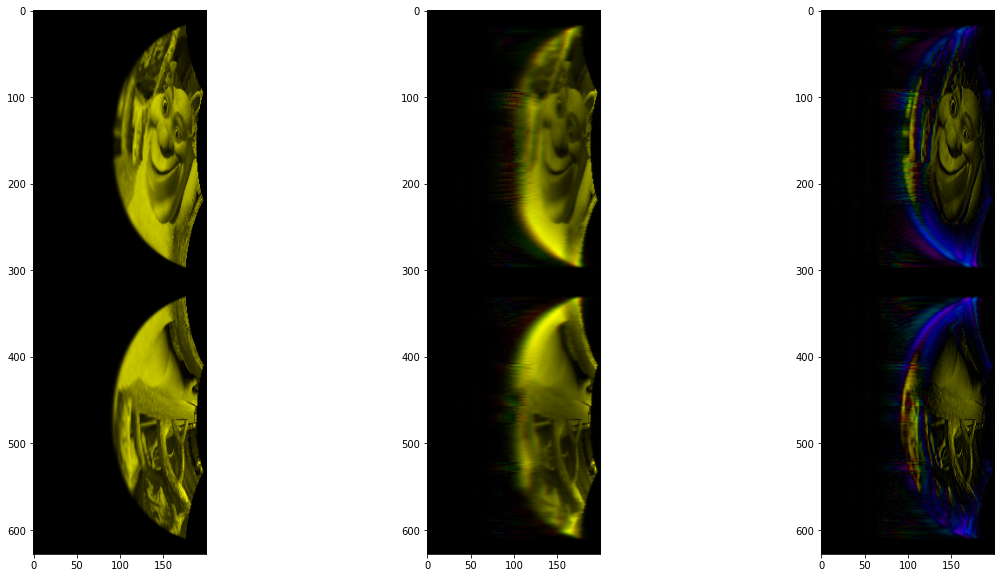

In [10]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

In [11]:
res = opt.inv

knots_freq = solution[:n_knots]
knots_space = solution[n_knots:2*n_knots]
aa = solution[2*n_knots:]

print(f"ect_rho={aa[0]:.3f}, ect_phi={aa[1]:.3f}, iect_rho={aa[2]:.3f}, iect_phi{aa[3]:.3f}")

fnf = ect.freqnorm(res.shape[:2], radius, knots_freq)
snf = ect.spacenorm(res.shape[:2], radius, knots_space)

print(f"{knots_freq=}\n{knots_space=}")

IndexError: index 0 is out of bounds for axis 0 with size 0

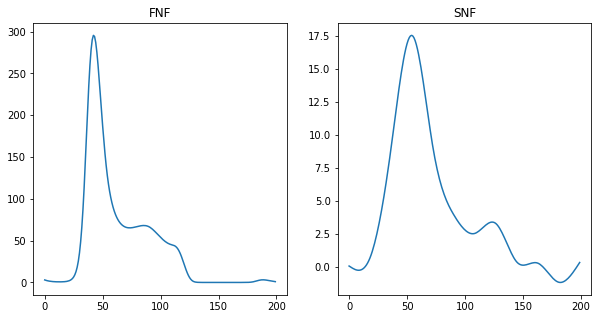

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("FNF")
plt.plot(fnf[0,:])

plt.subplot(1, 2, 2)
plt.title("SNF")
plt.plot(snf[0,:])

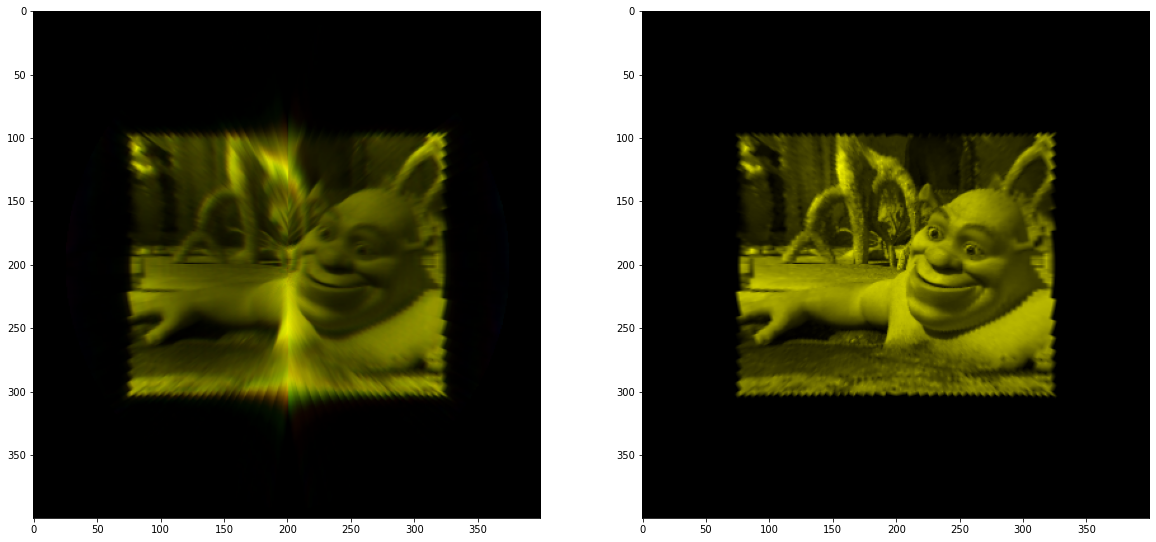

In [8]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)